In [11]:
from stylePredictor26 import StylePredictor as StylePredictor26
from transform26 import Ghiasi as Ghiasi26
from stylePredictor11 import StylePredictor as StylePredictor11
from transform11 import Ghiasi as Ghiasi11

from PIL import Image
import torch
import torchvision.transforms as T

In [12]:
content_cap = 384
transforms_content = torch.nn.Sequential(
  T.Resize(content_cap,),
  T.CenterCrop(content_cap),
)
transforms_style = torch.nn.Sequential(
  T.Resize(256,),
  T.CenterCrop(256),
  torch.nn.AvgPool2d(kernel_size=3,stride=1)
)

In [19]:
option = "26"

if option == "11":
  TRANS = Ghiasi11()
  PRED = StylePredictor11()
  TRANS.load_state_dict(torch.load("checkpoints/Ghiasi11.pth"))
  PRED.load_state_dict(torch.load("checkpoints/predictor11.pth"))
elif option == "26":
  TRANS = Ghiasi26()
  PRED = StylePredictor26()
  TRANS.load_state_dict(torch.load("checkpoints/Ghiasi26.pth"))
  PRED.load_state_dict(torch.load("checkpoints/predictor26.pth"))
else:
  raise

In [20]:
content = Image.open("doge.jpg").convert('RGB')
style = Image.open("doge.jpg").convert('RGB')

In [21]:
content_tensor = transforms_content(T.ToTensor()(content).unsqueeze(0))
style_tensor = transforms_style(T.ToTensor()(style)).unsqueeze(0)

In [22]:
code = PRED(style_tensor)

In [23]:
code

tensor([[5.5785e-02, 5.8297e-02, 1.1724e-01, 1.2926e-01, 8.9033e-02, 3.0611e-02,
         2.6267e-02, 3.6092e-02, 8.8509e-02, 1.9421e-03, 7.7226e-02, 8.5081e-02,
         1.2726e-03, 3.1131e-02, 6.4058e-02, 4.7558e-02, 6.8597e-02, 3.5610e-02,
         4.9914e-02, 1.6831e-01, 8.5569e-02, 3.1907e-02, 4.4006e-02, 4.7557e-02,
         1.0501e-01, 1.4050e-02, 3.4518e-02, 7.1252e-02, 6.8918e-02, 7.1095e-02,
         3.1737e-02, 2.7663e-02, 2.1724e-02, 6.0990e-02, 1.4525e-02, 6.1371e-02,
         1.2092e-01, 1.4051e-02, 1.1527e-01, 1.2831e-01, 1.1128e-01, 5.9951e-02,
         1.6080e-01, 3.2924e-02, 1.3415e-02, 5.0827e-02, 5.5093e-02, 1.8718e-01,
         4.8038e-02, 5.0747e-02, 5.4197e-02, 4.8082e-02, 2.3895e-02, 4.9535e-02,
         1.4143e-01, 1.1586e-01, 5.3061e-02, 4.0399e-02, 8.3478e-02, 2.8753e-02,
         2.0390e-02, 5.1237e-03, 1.1860e-02, 6.7323e-02, 9.2373e-02, 1.0188e-01,
         3.0640e-02, 2.6163e-02, 4.8829e-03, 7.8550e-02, 3.8357e-02, 4.7008e-02,
         4.0552e-02, 9.6214e

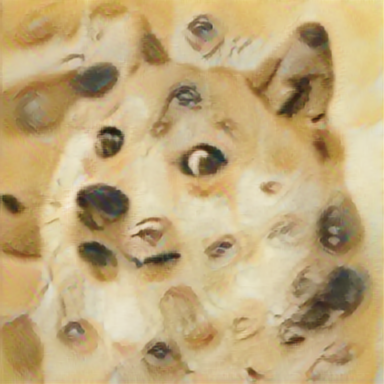

In [24]:
out = TRANS(content_tensor, code).squeeze()

T.ToPILImage()(out)